# Exploratory Analysis of COVID-19 Cases in the Philippines

Data gathered from January 1, 2020 to May 15, 2020 only. 

## 1. Importing Libraries and Dataset

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
data = pd.read_csv("D:/desktop/Daily Routine/Portfolio's Content/4. Covid 19 Cases in the Philippines/Case_Information.csv")
data.head()

,case_id,age,age_group,sex,date_announced,date_recovered,date_of_death,status,date_announced_as_removed,province,muni_city,health_status,home_quarantined,date_of_onset_of_symptoms,pregnant,region
0,C404174,38.0,35 to 39,Female,2020-01-30,NaN,NaN,Recovered,2020-02-07,Negros Oriental,Dumaguete City,Recovered,NaN,2020-01-21,NaN,Central Visayas (Region VII)
1,C462688,44.0,40 to 44,Male,2020-02-03,NaN,2020-02-01,Died,2020-02-02,Negros Oriental,Dumaguete City,Died,NaN,2020-01-18,NaN,Central Visayas (Region VII)
2,C387710,60.0,60 to 64,Female,2020-02-05,2020-01-31,NaN,Recovered,2020-02-05,Bohol,Panglao,Recovered,No,2020-01-21,NaN,Central Visayas (Region VII)
3,C377460,48.0,45 to 49,Male,2020-03-06,NaN,NaN,Recovered,2020-03-27,Metropolitan Manila,Taguig,Recovered,No,2020-03-03,NaN,Metropolitan Manila
4,C498051,62.0,60 to 64,Male,2020-03-06,NaN,2020-03-11,Died,2020-03-12,Rizal,Cainta,Died,No,2020-02-25,NaN,CALABARZON (Region IV-A)


In [62]:
data['status'].value_counts()

For validation      5790
Recovered           2460
Admitted            1772
Home quarantined    1263
Died                 806
Name: status, dtype: int64

## 2. Analysis of Age Group by Status

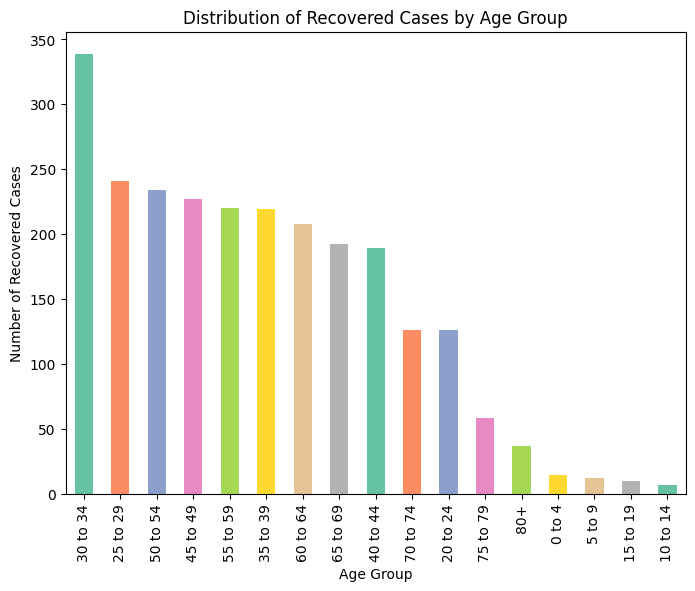

In [102]:
# 1. Recovered Cases

recovered_cases = data[data['status'] == 'Recovered']
plot_recovered_cases = recovered_cases['age_group'].value_counts()

plt.figure(figsize=(8, 6))
colors = sns.color_palette('Set2')
plot_recovered_cases.plot(kind='bar', color = colors)
plt.xlabel('Age Group')
plt.ylabel('Number of Recovered Cases')
plt.title('Distribution of Recovered Cases by Age Group')
plt.show()

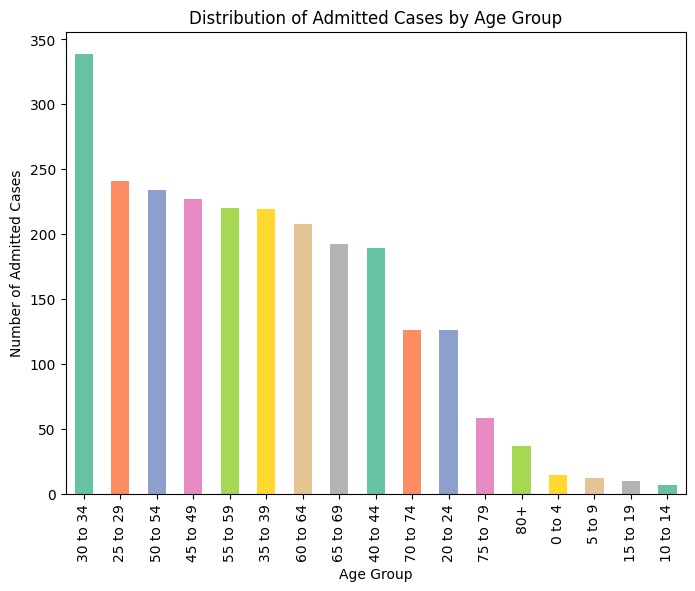

In [103]:
# 2. Admitted Cases

admitted_cases = data[data['status'] == 'Admitted']
plot_admitted_cases = recovered_cases['age_group'].value_counts()

plt.figure(figsize=(8, 6))
colors = sns.color_palette('Set2')
plot_admitted_cases.plot(kind='bar', color = colors)
plt.xlabel('Age Group')
plt.ylabel('Number of Admitted Cases')
plt.title('Distribution of Admitted Cases by Age Group')
plt.show()

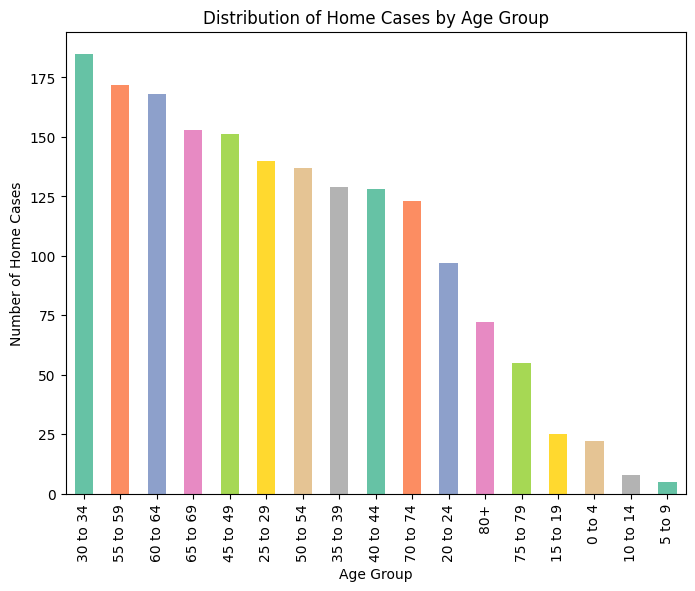

In [104]:
# 3. Home Quarantined Cases

home_cases = data[data['status'] == 'Admitted']
plot_home_cases = home_cases['age_group'].value_counts()

plt.figure(figsize=(8, 6))
colors = sns.color_palette('Set2')
plot_home_cases.plot(kind='bar', color = colors)
plt.xlabel('Age Group')
plt.ylabel('Number of Home Cases')
plt.title('Distribution of Home Cases by Age Group')
plt.show()

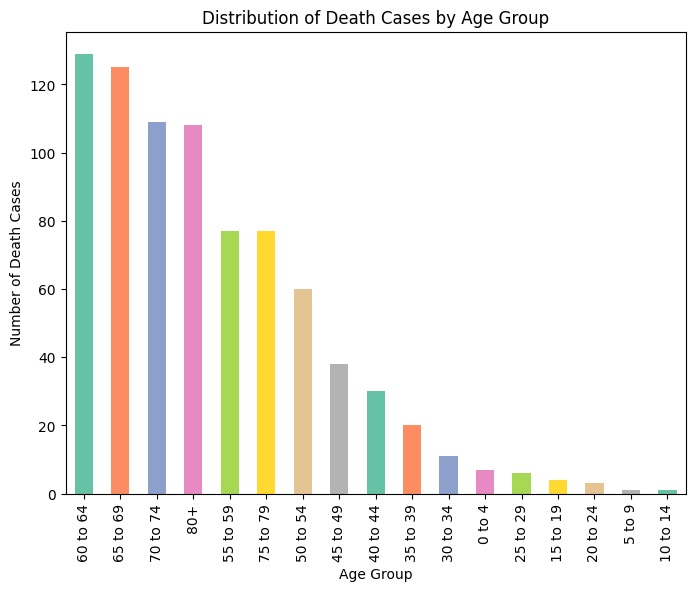

In [106]:
# 4. Death Cases

death_cases = data[data['status'] == 'Died']
plot_death_cases = death_cases['age_group'].value_counts()

plt.figure(figsize=(8, 6))
colors = sns.color_palette('Set2')
plot_death_cases.plot(kind='bar', color = colors)
plt.xlabel('Age Group')
plt.ylabel('Number of Death Cases')
plt.title('Distribution of Death Cases by Age Group')
plt.show()

## 3. Gender Analysis

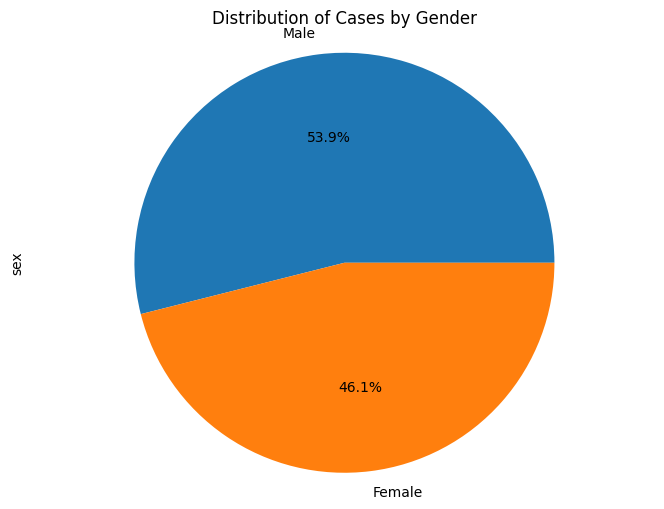

In [9]:
gender_counts = data['sex'].value_counts()
gender_percentages = data['sex'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Cases by Gender')
plt.axis('equal')
plt.show()

## 4. Trends of Cases Over Time Analysis

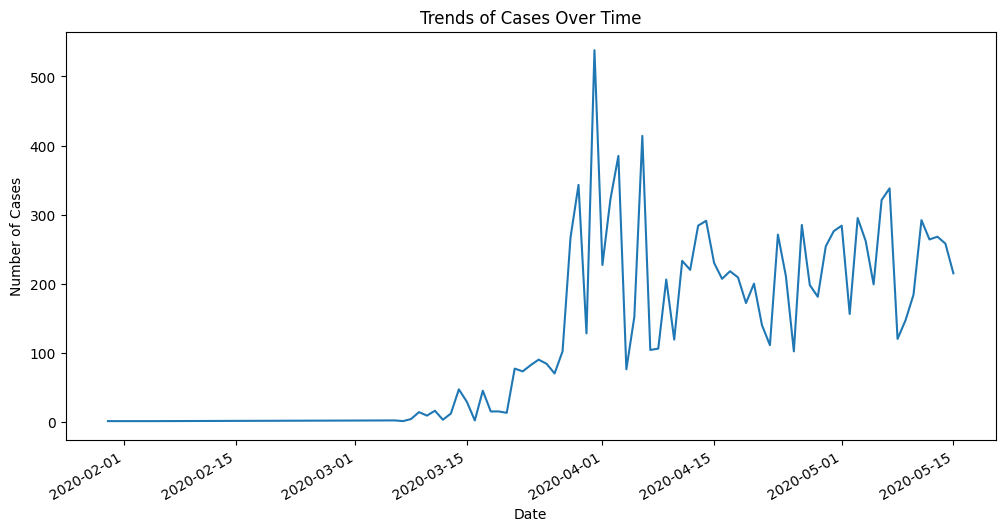

In [10]:
data['date_announced'] = pd.to_datetime(data['date_announced'])
cases_by_date = data['date_announced'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
cases_by_date.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Trends of Cases Over Time')
plt.show()

## 5. Recovery and Mortality Analysis Rate 

In [107]:
recovery_rate = data['date_recovered'].notnull().sum() / len(data) * 100
mortality_rate = data['date_of_death'].notnull().sum() / len(data) * 100
print(f"Recovery Rate: {recovery_rate:.2f}%")
print(f"Mortality Rate: {mortality_rate:.2f}%")

Recovery Rate: 10.23%
Mortality Rate: 5.43%


## 6. Status Analysis

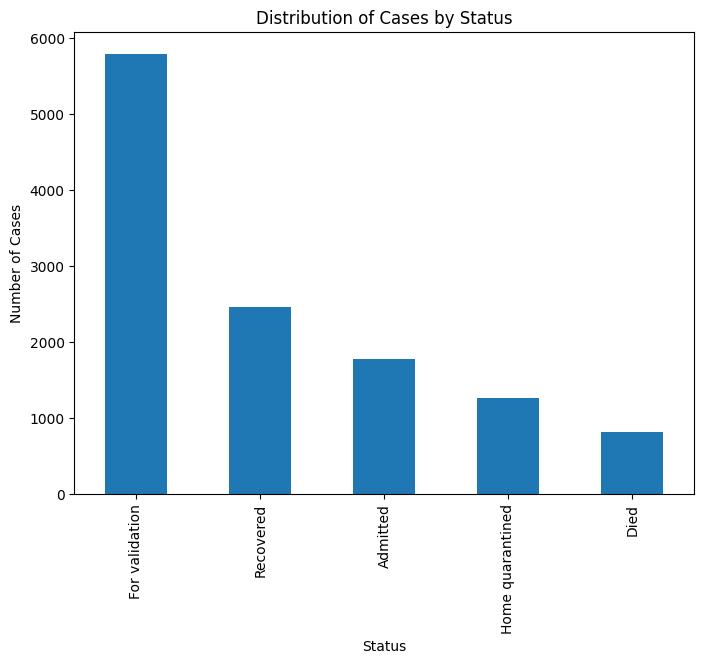

In [13]:
status_counts = data['status'].value_counts()
status_percentages = data['status'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
status_counts.plot(kind='bar')
plt.xlabel('Status')
plt.ylabel('Number of Cases')
plt.title('Distribution of Cases by Status')
plt.show()

## 7. Status Analysis by Province

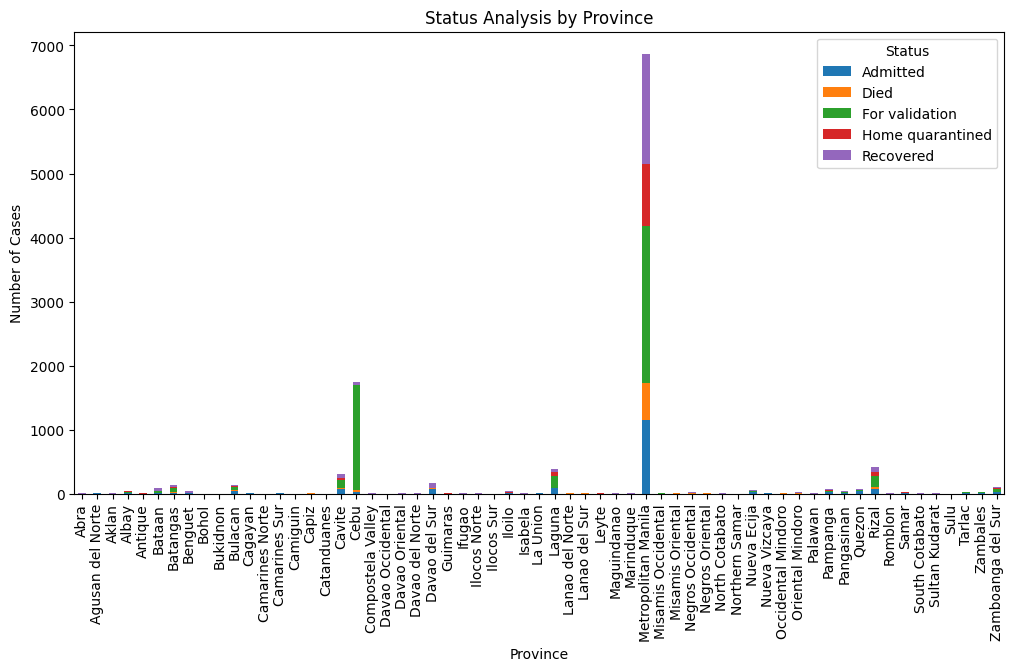

In [109]:
status_by_province = data.groupby('province')['status'].value_counts().unstack()

status_by_province.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Province')
plt.ylabel('Number of Cases')
plt.title('Status Analysis by Province')
plt.legend(title='Status')
plt.show()

## 8. Regional Analysis

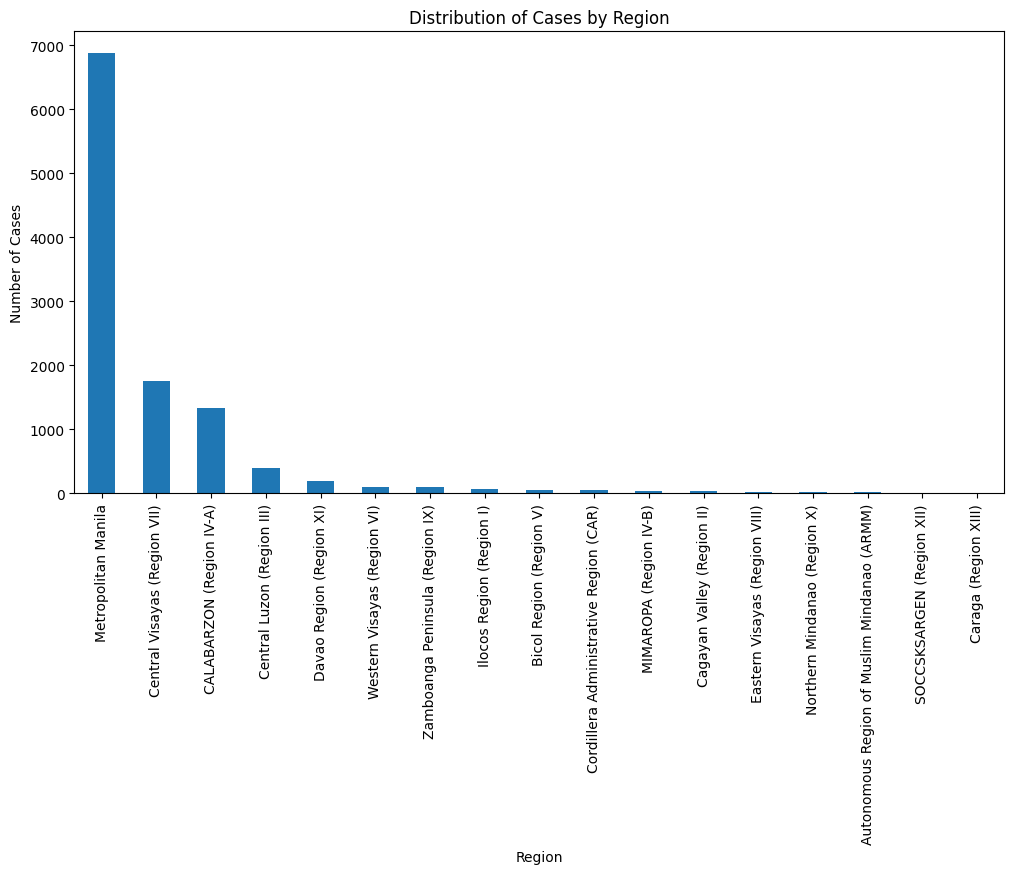

In [14]:
region_counts = data['region'].value_counts()
region_percentages = data['region'].value_counts(normalize=True) * 100

# Plot Regional Analysis
plt.figure(figsize=(12, 6))
region_counts.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Number of Cases')
plt.title('Distribution of Cases by Region')
plt.show()

## 9. Health Status Analysis

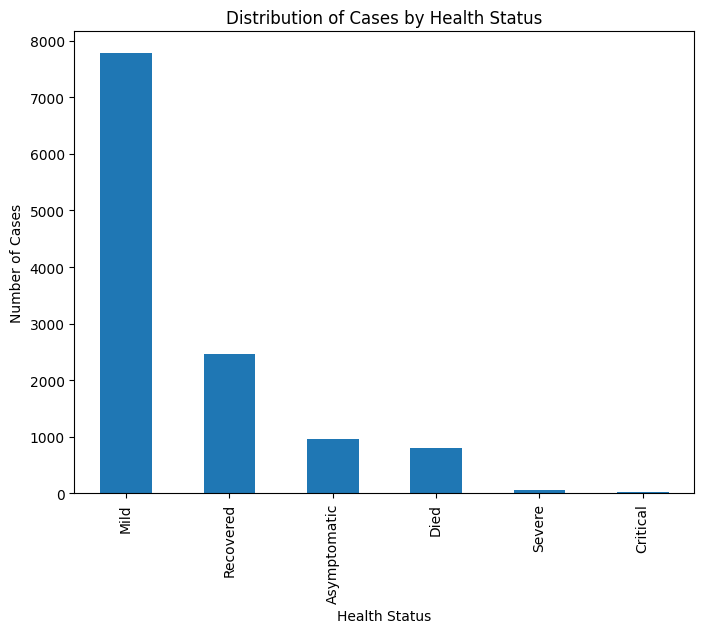

In [114]:
health_status_counts = data['health_status'].value_counts()
health_status_percentages = data['health_status'].value_counts(normalize=True) * 100


plt.figure(figsize=(8, 6))
health_status_counts.plot(kind='bar')
plt.xlabel('Health Status')
plt.ylabel('Number of Cases')
plt.title('Distribution of Cases by Health Status')
plt.show()
